# COURSE: A deep understanding of deep learning

## SECTION: ANNs

### LECTURE: ANN for classifying qwerties

#### TEACHER: Mike X Cohen, sincxpress.com

##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210


In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def t2f(x: torch.Tensor) -> np.ndarray:
    return x.detach().cpu().numpy().flatten()


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


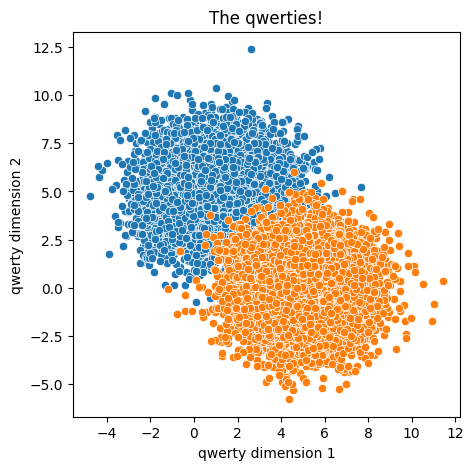

In [2]:
# create data

n_per_clust = 10000
blur = 1.5

A = [1, 5]
B = [5, 0]

# generate data
a = [
    A[0] + np.random.randn(n_per_clust) * blur,
    A[1] + np.random.randn(n_per_clust) * blur,
]
b = [
    B[0] + np.random.randn(n_per_clust) * blur,
    B[1] + np.random.randn(n_per_clust) * blur,
]

# true labels
labels_np = np.hstack((np.zeros((n_per_clust)), np.ones((n_per_clust))))

# concatanate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np, device=device).float()
labels = torch.tensor(labels_np, device=device).float().reshape(-1,1)

# show the data
plt.figure(figsize=(5, 5))
sns.scatterplot(x=data_np[labels_np==0,0], y=data_np[labels_np==0,1])
sns.scatterplot(x=data_np[labels_np==1,0], y=data_np[labels_np==1,1])
plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()


In [3]:
# inspect types
print(type(data_np))
print(data_np.shape)
print()

print(type(data))
print(data.shape)


<class 'numpy.ndarray'>
(20000, 2)

<class 'torch.Tensor'>
torch.Size([20000, 2])


In [4]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2, 5),  # input layer
    nn.ReLU(),  # activation unit
    nn.Linear(5, 1),  # output unit
    nn.Sigmoid(),  # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
).to(device)

ANNclassify


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)

In [5]:
# other model features
learningRate = 0.01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)


In [6]:
# train the model
numepochs = 10000

try:
    losses
except NameError:
    losses = torch.zeros(0, device=device)

for epochi in range(numepochs):

    # forward pass
    y_hat = ANNclassify(data)

    # compute loss
    loss = lossfun(y_hat, labels)
    losses = torch.cat((losses, loss.view(1)), 0)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


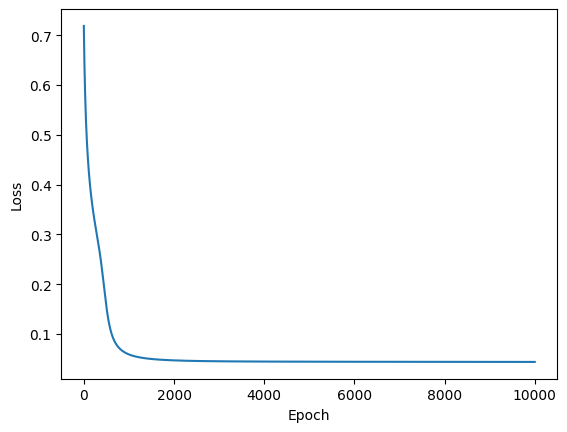

In [7]:
# show the losses
plt.figure()
sns.lineplot(data=t2f(losses))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [8]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

# find errors
misclassified = np.where(t2f(predlabels != labels))[0]

# total accuracy
totalacc = 100 - 100 * len(misclassified) / (2 * n_per_clust)

print(f"Final accuracy: {totalacc}%")


Final accuracy: 98.37%


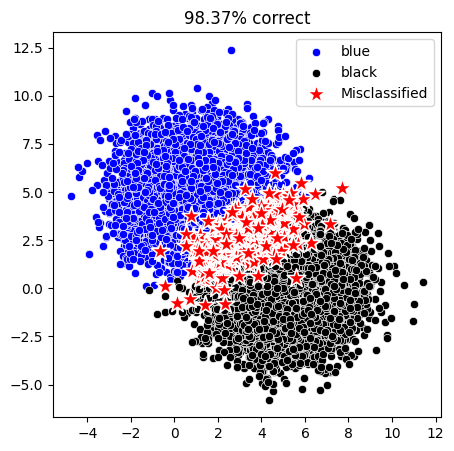

In [9]:
# plot the labeled data
plt.figure(figsize=(5, 5))
sns.scatterplot(
    x=data_np[~t2f(predlabels), 0],
    y=data_np[~t2f(predlabels), 1],
    label="blue",
    c="blue",
)
sns.scatterplot(
    x=data_np[t2f(predlabels), 0],
    y=data_np[t2f(predlabels), 1],
    label="black",
    c="black",
)
sns.scatterplot(
    x=data_np[misclassified, 0],
    y=data_np[misclassified, 1],
    label="Misclassified",
    marker="*",
    color="red",
    s=200
)

plt.title(f"{totalacc}% correct")
plt.show()


# Additional explorations


In [10]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
#
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the
#    qwerty-generating code to get the model to have 100% classification accuracy.
#
